<a href="https://colab.research.google.com/github/Vishal487/Fashion-MNIST/blob/master/Fashion_mnist_iitpkd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzip the dataset zip file (commenting out bcz we don't need to do it agin and again)

# !unzip "drive/My Drive/fashion-mnist_train.zip" -d "drive/My Drive/"

In [ ]:
# path to train csv file:-
# drive/My Drive/fashion-mnist_train.csv

In [ ]:
# required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD, adam

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


### Data Preprocessing

In [ ]:
# load the training dataset

train_csv = pd.read_csv('drive/My Drive/fashion-mnist_train.csv')
train_csv.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_csv.shape

(60000, 785)

In [ ]:
# checking for any NAN/missing value(s)

sum(train_csv.isna().sum())     # no missing value

0

In [ ]:
# split into X(feature) and y(target)

X = train_csv.drop('label', axis=1)
y = train_csv['label']

In [ ]:
X.shape, y.shape

((60000, 784), (60000,))

In [ ]:
# check for how many sample belongs to each class
y.value_counts()          # wow! super balanced

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [ ]:
# normalization:   0-255 => 0-1
X = X / 255.0

In [ ]:
X.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# now reshape the images     784 => (28, 28, 1)          bcz of grayscale...
X = X.values.reshape(-1, 28, 28, 1)

In [ ]:
X.shape

(60000, 28, 28, 1)

In [ ]:
# label encoding

y = keras.utils.np_utils.to_categorical(y, num_classes=10)

In [ ]:
y.shape

(60000, 10)

**We're ready with X_train and y_train**

### Create and build the Model

In [ ]:
# let's split into training and validation set
np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((54000, 28, 28, 1), (54000, 10), (6000, 28, 28, 1), (6000, 10))

In [ ]:
# Build the model

model = Sequential()
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
# compile the model

model.compile(optimizer=RMSprop(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# training the model

batch_size = 86
epochs = 30

history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val, y_val),
                    verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
 - 6s - loss: 0.4736 - accuracy: 0.8264 - val_loss: 0.3091 - val_accuracy: 0.8827
Epoch 2/30
 - 4s - loss: 0.2826 - accuracy: 0.8962 - val_loss: 0.2428 - val_accuracy: 0.9138
Epoch 3/30
 - 4s - loss: 0.2417 - accuracy: 0.9111 - val_loss: 0.2363 - val_accuracy: 0.9168
Epoch 4/30
 - 4s - loss: 0.2206 - accuracy: 0.9193 - val_loss: 0.2088 - val_accuracy: 0.9250
Epoch 5/30
 - 4s - loss: 0.2023 - accuracy: 0.9254 - val_loss: 0.2073 - val_accuracy: 0.9273
Epoch 6/30
 - 4s - loss: 0.1912 - accuracy: 0.9301 - val_loss: 0.2088 - val_accuracy: 0.9287
Epoch 7/30
 - 4s - loss: 0.1803 - accuracy: 0.9348 - val_loss: 0.2166 - val_accuracy: 0.9208
Epoch 8/30
 - 4s - loss: 0.1748 - accuracy: 0.9362 - val_loss: 0.2123 - val_accuracy: 0.9315
Epoch 9/30
 - 4s - loss: 0.1702 - accuracy: 0.9392 - val_loss: 0.2062 - val_accuracy: 0.9313
Epoch 10/30
 - 4s - loss: 0.1653 - accuracy: 0.9413 - val_loss: 0.1968 - val_accuracy: 0.9305
Epoch 11/30
 - 4s - 

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

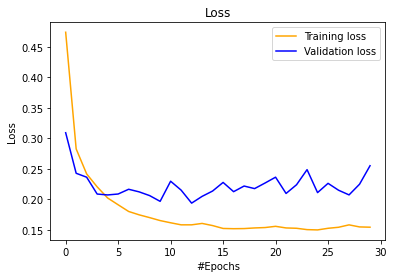

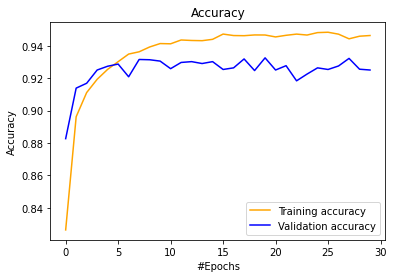

In [ ]:
# Let's plot the loss and accuracy

plt.plot(np.arange(epochs), history.history['loss'], color='orange', label='Training loss')
plt.plot(np.arange(epochs), history.history['val_loss'], color='blue', label='Validation loss')
plt.title('Loss')
plt.xlabel('#Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(np.arange(epochs), history.history['accuracy'], color='orange', label='Training accuracy')
plt.plot(np.arange(epochs), history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('#Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Okay now training our model on full training dataset**

after enough hyperparameter tuning we got above thing and now we'll train on full dataset

In [ ]:
# note that (X,y) is full training dataset
# and now we don't have validation dataset anymore

# Rebuilding the same model
model = Sequential()
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(32, (5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()




# compile the model
model.compile(optimizer=RMSprop(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])



# fit the model ON TOTAL TRAINING SET AND NO VALIDATION SET
history = model.fit(X, y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

### Preparing for submission

In [ ]:
# load the test dataset

test = pd.read_csv('drive/My Drive/Q2_Clothing_test.csv')
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,105,96,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,15,172,92,0,0,0,0,0,125,165,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,244,247,241,...,255,255,235,201,82,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,61,2,0,14,67,54,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,4,129,95,125,139,47,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,143,...,62,79,156,165,12,0,2,0,0,0,0,0,0,0,0,0,1,1,0,2,82,78,83,87,83,82,79,79,79,93,155,163,19,0,2,0,0,0,0,0


In [ ]:
# making the same format as training set

# normalize
test = test / 255.0

# reshape
test = test.values.reshape(-1, 28, 28, 1)

test.shape

(1000, 28, 28, 1)

In [ ]:
# making prediction on test dataset

prediction = model.predict(test)

In [ ]:
# let's see prediction made on first image
prediction[0]

array([2.4046698e-09, 4.5936636e-11, 3.1396473e-07, 6.9948145e-09,
       8.0572315e-10, 8.3542487e-04, 4.3864560e-08, 3.3075240e-01,
       1.3333815e-03, 6.6707850e-01], dtype=float32)

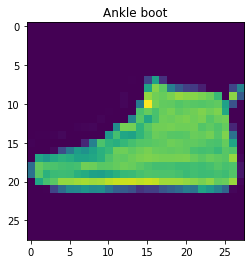

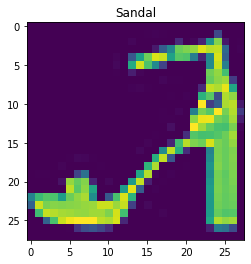

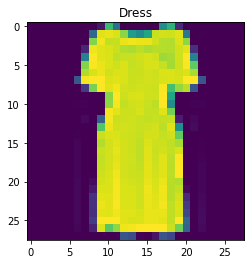

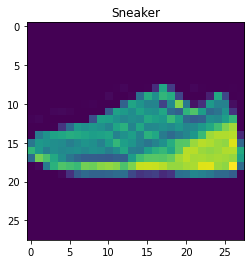

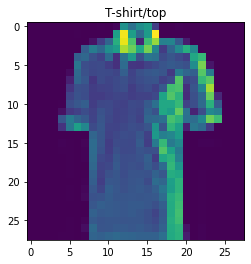

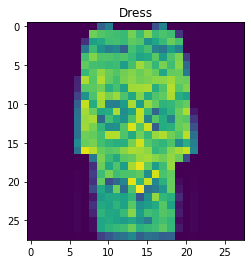

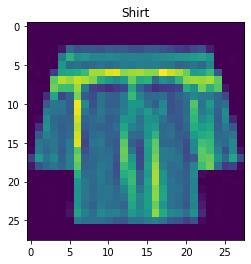

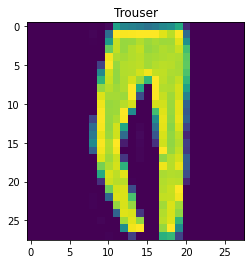

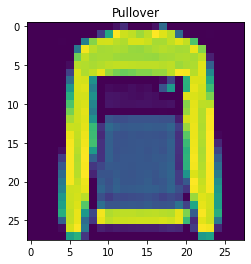

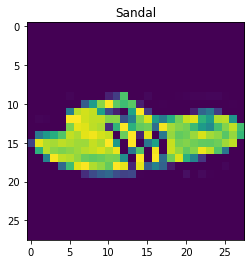

In [ ]:
# let's visualize first 10 prediction

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(10):
    im = np.array(test[i]).reshape(28, 28)
    plt.imshow(im)
    plt.title(class_name[np.argmax(prediction[i])])
    plt.show()

In [ ]:
# getting exact prediction

submission = []
for pred in prediction:
    submission.append(np.argmax(pred))

In [ ]:
# making submission dataframe

submission_fashion_mnist = pd.DataFrame()
submission_fashion_mnist['class'] = submission 
submission_fashion_mnist.head()

,class
0,9
1,5
2,3
3,7
4,0


In [ ]:
# now save pandas DF as csv file
submission_fashion_mnist.to_csv('drive/My Drive/submission_fashion_mnist.csv', index=False)

SyntaxError: ignored